<div style="display: flex; justify-content: center;">
    <img src="imagenes/tosti.jpg" style="border-radius: 20px; width: 75%;">
</div>

<small> Imagen creada por IA generativa usando el siguiente pront: 'Dibújame un robot (con cabeza de tostadora) pensativo, sentado en una mesa.  
 El dibujo no debe ser muy recargado, solo el robot y parte de la mesa.'<small>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
from scipy.stats import ttest_ind 
from scipy import stats
from scipy.stats import f_oneway

### La hipótesis a la que en este Jupyter se trata de dar respuesta es que el tiempo que un vehículo pasa en el depósito dependerá del tipo de vehículo.

>Para ello, lo primero será, obviamente, cargar los dataframes que había creado en el Jupyter 'preparacion_datos_salida.ipynb'.

In [2]:
df_salidas_todo = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\df_salidas_todo')
df_salidas_todo.head(5) 
df_salidas_todo_copia = df_salidas_todo.copy()

In [3]:
df_salidas_todo_copia.tail(5)

,tipoVehiculo,motivo,turno,grua,tipoVia,via,numero,cp,depositoEntrada,fechaEntrada,depositoSalida,fechaSalida,TiempoEnDeposito (dias)
idVehiculo,,,,,,,,,,,,,
M320230302121512,Motocicleta,Sustraído,Mañana,S373,CAMINO,PERALES,173,28053,MEDIODIA 3,2023-03-02 12:00:00,MEDIODIA 3,2023-03-02 19:00:00,0 days 07:00:00
M320220607093759,Coche,Prohibido Placas,Mañana,S363,CAMINO,PERALES,23,28053,MEDIODIA 3,2022-06-07 09:36:00,MEDIODIA 3,2023-01-25 17:35:00,232 days 07:59:00
M320220607112625,Coche,Falta de documentación,Mañana,S335,CAMINO,PERALES,0,28053,MEDIODIA 3,2022-06-07 11:25:00,MEDIODIA 3,2023-02-15 10:56:00,252 days 23:31:00
PI20230202122016,Coche,Prohibido Placas,Mañana,S331,PUERTO,BALBARAN,133,28018,PASEO IMPERIAL,2023-02-02 12:15:00,PASEO IMPERIAL,2023-02-02 17:52:00,0 days 05:37:00
CO20230916170349,Motocicleta,R Minusválido,Tarde,S367,CAMINO,DE HORTALEZA,0,None,COLON,2023-09-16 17:02:00,COLON,2023-09-21 08:28:00,4 days 15:26:00


### También cargaremos los dataframes de cada año, por si en algún momento hacen falta.

In [4]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
for año in años:
    print(f"#Año {año}")
    print(f"df_salidas{año} = pd.read_parquet(r'C:\\Users\\pepea\\Desktop\\the_drige\\EDA\\salidas_validas\\salidas{año}_util.parquet')")
    print()

#Año 2016
df_salidas2016 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2016_util.parquet')

#Año 2017
df_salidas2017 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2017_util.parquet')

#Año 2018
df_salidas2018 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2018_util.parquet')

#Año 2019
df_salidas2019 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2019_util.parquet')

#Año 2020
df_salidas2020 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2020_util.parquet')

#Año 2021
df_salidas2021 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2021_util.parquet')

#Año 2022
df_salidas2022 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2022_util.parquet')

#Año 2023
df_salidas2023 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2023_util.par

In [5]:
#Año 2016
df_salidas2016 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2016_util.parquet')

#Año 2017
df_salidas2017 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2017_util.parquet')

#Año 2018
df_salidas2018 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2018_util.parquet')

#Año 2019
df_salidas2019 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2019_util.parquet')

#Año 2020
df_salidas2020 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2020_util.parquet')

#Año 2021
df_salidas2021 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2021_util.parquet')

#Año 2022
df_salidas2022 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2022_util.parquet')

#Año 2023
df_salidas2023 = pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\salidas_validas\salidas2023_util.parquet')

Ya los tenemos cargados. Lo primero que haremos es volcar la media de estancia en una variable.

In [6]:
media_tiempo = df_salidas_todo_copia['TiempoEnDeposito (dias)'].mean()

print("Media de tiempo en el depósito:", media_tiempo)


Media de tiempo en el depósito: 30 days 09:02:01.225065612


### Prepararemos una tabla con el tiempo medio que pasa cada tipo de vehículo en el depósito, para poder generar una figura con facilidad.

In [7]:
df_media_tiempo = df_salidas_todo_copia.groupby('tipoVehiculo')['TiempoEnDeposito (dias)'].mean().reset_index()
df_media_tiempo = df_media_tiempo.reset_index(drop=True).set_index('tipoVehiculo')
df_media_tiempo = df_media_tiempo.rename(columns={'TiempoEnDeposito (dias)': 'Tiempo medio en deposito'})

df_media_tiempo

,Tiempo medio en deposito
tipoVehiculo,
Bicicletas,127 days 06:37:01.208053692
Camión,41 days 16:54:14.488391439
Coche,27 days 02:15:50.025927042
Motocarro,26 days 17:06:51.864406779
Motocicleta,45 days 09:37:45.642012813
Patinetes (VMP),22 days 21:12:52.217756668
Remolque,62 days 13:03:06.976744186
Vehículo pesado,24 days 09:02:32.093023255


In [8]:
df_media_tiempo['Tiempo medio en deposito (float)'] = df_media_tiempo['Tiempo medio en deposito'].dt.days + df_media_tiempo['Tiempo medio en deposito'].dt.seconds / (24 * 3600)
df_media_tiempo

,Tiempo medio en deposito,Tiempo medio en deposito (float)
tipoVehiculo,,
Bicicletas,127 days 06:37:01.208053692,127.275706
Camión,41 days 16:54:14.488391439,41.704329
Coche,27 days 02:15:50.025927042,27.094329
Motocarro,26 days 17:06:51.864406779,26.713090
Motocicleta,45 days 09:37:45.642012813,45.401215
Patinetes (VMP),22 days 21:12:52.217756668,22.883935
Remolque,62 days 13:03:06.976744186,62.543819
Vehículo pesado,24 days 09:02:32.093023255,24.376759


>Necesitamos una columna en formato float, el tipo delta da problemas al hacer la figura.

In [9]:
df_media_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Bicicletas to Vehículo pesado
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   Tiempo medio en deposito          8 non-null      timedelta64[ns]
 1   Tiempo medio en deposito (float)  8 non-null      float64        
dtypes: float64(1), timedelta64[ns](1)
memory usage: 192.0+ bytes


In [10]:
linea_media_tiempo = media_tiempo.days + media_tiempo.seconds / (24 * 3600)

linea_media_tiempo

30.376400462962962

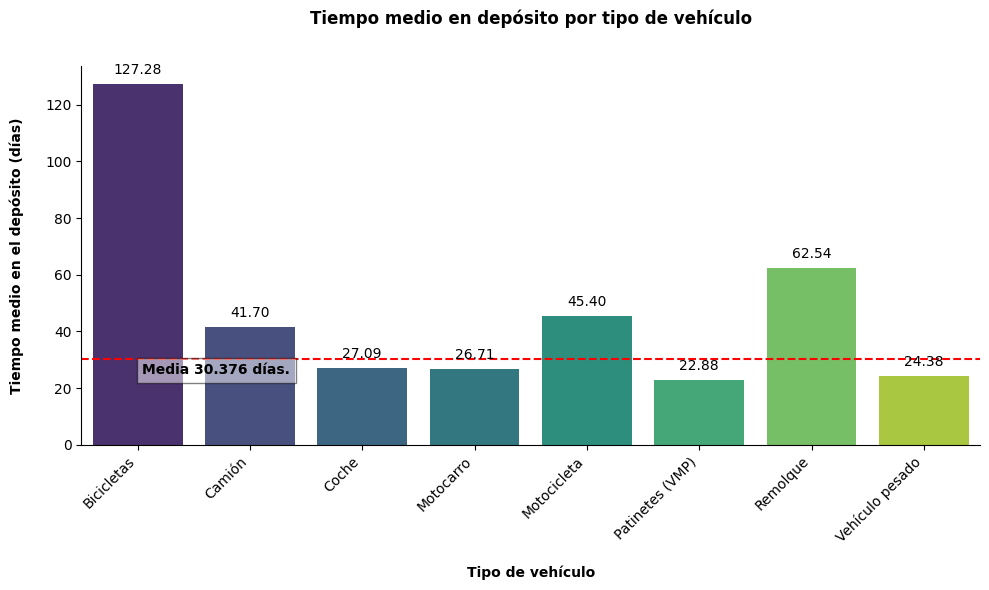

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_media_tiempo.index, y='Tiempo medio en deposito (float)', hue=df_media_tiempo.index, data=df_media_tiempo, palette='viridis', dodge=False)

plt.xlabel('Tipo de vehículo', labelpad=15, fontweight='bold')
plt.ylabel('Tiempo medio en el depósito (días)', labelpad=15, fontweight='bold')
plt.title('Tiempo medio en depósito por tipo de vehículo', fontweight='bold', pad=30)

plt.xticks(rotation=45, ha='right')

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points') 

plt.text(df_media_tiempo.index.get_loc('Bicicletas') + 0.7, 23.8, 'Media 30.376 días.', ha='center', va='bottom', color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
plt.axhline(y=linea_media_tiempo, color='r', linestyle='--', label='Media')
plt.tight_layout()
sns.despine()
plt.savefig("figura_salida/tiempoEnDeposito.png")
plt.show()

Viendo la gráfica se demuestra que mi idea era errónea. Pensé que los camiones y vehículos pesados pasarían menos tiempo en el depósito que los coches. La diferencia entre los tipos de vehículos y la naturaleza de los datos hace adecuado realizar un estudio ANOVA.

>Prepararemos un dataframe solo con las columnas que nos interesan, para realizar el ANOVA con facilidad

In [12]:
df_salidas_todo_copia.head()

,tipoVehiculo,motivo,turno,grua,tipoVia,via,numero,cp,depositoEntrada,fechaEntrada,depositoSalida,fechaSalida,TiempoEnDeposito (dias)
idVehiculo,,,,,,,,,,,,,
321,Camión,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1995-11-29,Mediodía 2,2016-07-26 09:59:00,7545 days 09:59:00
528,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1996-05-08,Mediodía 2,2016-05-18 17:11:00,7315 days 17:11:00
592,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1996-05-14,Mediodía 2,2016-11-25 14:21:00,7500 days 14:21:00
162,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1997-02-27,Mediodía 2,2016-06-29 18:55:00,7062 days 18:55:00
217,Coche,Precinto,Mañana,None,CALLE,SIN DETERMINAR,0,28001,Mediodía 2,1997-04-30,Vicálvaro,2016-08-08 12:58:00,7040 days 12:58:00


In [21]:
df_anova = df_salidas_todo_copia[["tipoVehiculo", "TiempoEnDeposito (dias)"]]
df_anova['Tiempo en deposito (float)'] = df_anova['TiempoEnDeposito (dias)'].dt.days + df_anova['TiempoEnDeposito (dias)'].dt.seconds / (24 * 3600) 


C:\Users\pepea\AppData\Local\Temp\ipykernel_3400\2905714637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova['Tiempo en deposito (float)'] = df_anova['TiempoEnDeposito (dias)'].dt.days + df_anova['TiempoEnDeposito (dias)'].dt.seconds / (24 * 3600)


In [24]:
df_anova.head(3)

,tipoVehiculo,TiempoEnDeposito (dias),Tiempo en deposito (float)
idVehiculo,,,
321,Camión,7545 days 09:59:00,7545.415972
528,Coche,7315 days 17:11:00,7315.715972
592,Coche,7500 days 14:21:00,7500.597917


## ANOVA

In [33]:
anova_result = f_oneway(
    df_anova[df_anova['tipoVehiculo'] == 'Bicicletas']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Camión']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Coche']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Motocarro']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Motocicleta']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Patinetes (VMP)']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Remolque']['Tiempo en deposito (float)'],
    df_anova[df_anova['tipoVehiculo'] == 'Vehículo pesado']['Tiempo en deposito (float)']
)


print("El valor de p es muy pequeño (",anova_result.pvalue,"), lo que sugiere una alta significancia")
print("estadística y el rechazo de la hipótesis nula. Además, la estadística F (",anova_result.statistic,") es")
print("sustancialmente mayor que 1, indicando una diferencia significativa en los tiempos de permanencia entre")
print("al menos dos tipos de vehículos en el depósito.")


El valor de p es muy pequeño ( 1.3451510895785672e-139 ), lo que sugiere una alta significancia
estadística y el rechazo de la hipótesis nula. Además, la estadística F ( 95.26872197948502 ) es
sustancialmente mayor que 1, indicando una diferencia significativa en los tiempos de permanencia entre
al menos dos tipos de vehículos en el depósito.


Después de realizar la prueba de Análisis de Varianza (ANOVA) y encontrar una relación  
significativa entre los grupos, realizaremos la prueba de Tukey como análisis post hoc. El término  
'post hoc' significa 'después de esto' y se refiere a las pruebas o análisis realizados después de la  
prueba de hipótesis inicial para investigar y comprender mejor las diferencias específicas entre los grupos.